In [1]:
import glob
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd

from datetime import datetime
from matplotlib.dates import DateFormatter
from matplotlib.ticker import AutoMinorLocator
from notebook_utils import configure_path, setup_matplotlib

In [2]:
configure_path()
setup_matplotlib()

## M-LAB Bandwidth Analysis

We examine the evolution of bandwidth in Venezuela and the rest of Latin America. Lagging behind other peer nations in these key aspects can indicate Venezuelans’ impediment to properly interacting with the always-evolving bandwidth-intensive online services.

We use throughput measurements collected by M-LAB to study the bandwidth evolution in Venezuela compared to the rest of the region.

The dataset was collected from public M-LAB's BigQuery. Instructions to download the data are available on https://www.measurementlab.net/data/docs/bq/quickstart

In [3]:
mlab = {}
data_retrieval_failed_country_codes = []

for f in glob.glob("data/raw/11-mlab/*.csv"):
    cc = f.split("/")[-1].split("_")[1]
    try:
        mlab[cc] = pd.read_csv(f)
    except:
        data_retrieval_failed_country_codes.append(cc)

print(
    f"Failed to retrieve data from LACNIC country codes {data_retrieval_failed_country_codes}"
)

Failed to retrieve data from LACNIC country codes ['CR', 'BO', 'CO', 'TT', 'AN']


In [4]:
mlab["VE"].head()

,dt_utc,test_cnt,ip_cnt,asn_cnt,svr_cc_cnt,MIN_download,Q25_download,MED_download,AVG_download,Q75_download,MAX_download
0,2009-07-01 00:00:00,5,4,2,1,0.065656,0.074848,0.117267,0.266764,0.144293,0.931756
1,2009-08-01 00:00:00,80,27,3,1,0.019014,0.178086,0.349155,0.392302,0.522376,0.946343
2,2009-09-01 00:00:00,102,75,8,4,0.008148,0.240403,0.678416,0.647666,0.915869,2.622749
3,2009-10-01 00:00:00,57,43,4,4,0.016884,0.253028,0.430811,0.548951,0.878787,1.294910
4,2009-11-01 00:00:00,123,52,5,4,0.010126,0.231008,0.459531,0.528288,0.846544,1.544856


In [5]:
total_msms_count = 0
for cc in mlab.keys():
    total_msms_count += mlab[cc]["test_cnt"].sum()

print(f"Total measurements count: {total_msms_count}")

Total measurements count: 446716285


In [6]:
ve_measurements_count = mlab["VE"]["test_cnt"].sum()
print(f"Venezuela measurements count: {ve_measurements_count}")

Venezuela measurements count: 3906715


In [7]:
def castdt(t):
    return datetime.strptime(t.split(".")[0], "%Y-%m-%d %H:%M:%S")

In [8]:
country_styles = {
    "AR": {"alpha": 0.75, "lw": 2, "color": "C0", "label": "AR"},
    "AW": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "BZ": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "BO": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "BQ": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "BR": {"alpha": 0.75, "lw": 2, "color": "C1", "label": "BR"},
    "CL": {"alpha": 0.75, "lw": 2, "color": "C2", "label": "CL"},
    "CO": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "CR": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "CU": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "CW": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "DO": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "EC": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "SV": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "FK": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "GF": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "GT": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "GY": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "HT": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "HN": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "MX": {"alpha": 0.75, "lw": 2, "color": "C3", "label": "MX"},
    "NI": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "PA": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "PY": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "PE": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "SX": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "GS": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "SR": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "TT": {"alpha": 0.5, "lw": 0.25, "color": "grey", "label": None},
    "UY": {"alpha": 0.75, "lw": 2, "color": "C5", "label": "UY"},
    "VE": {"alpha": 0.75, "lw": 2, "color": "purple", "label": "VE"},
}

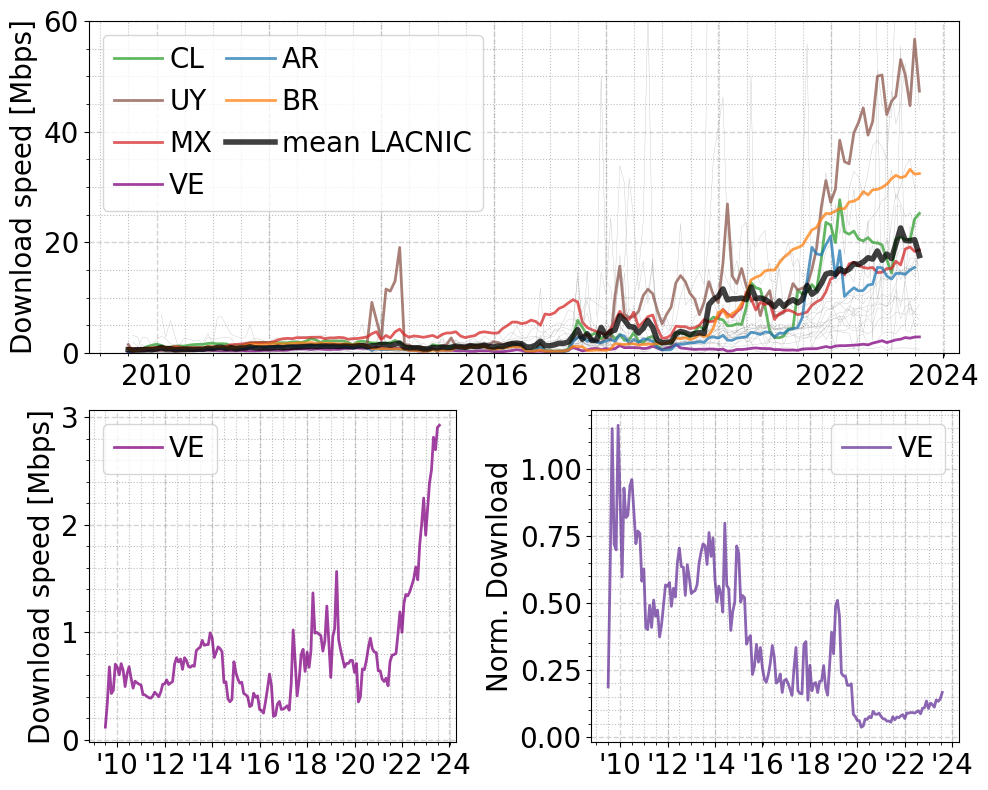

In [9]:
fig = plt.figure(figsize=(10, 8))

gs = fig.add_gridspec(2, 2)

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

field = "MED_download"

i = 0
for cc in mlab.keys():
    ax1.plot_date(
        mlab[cc]["dt_utc"].map(castdt),
        mlab[cc][field],
        label=country_styles[cc]["label"],
        xdate=True,
        ydate=False,
        tz="UTC",
        alpha=country_styles[cc]["alpha"],
        lw=country_styles[cc]["lw"],
        fmt="-",
        marker="None",
        color=country_styles[cc]["color"],
    )

mean_lacnic = pd.DataFrame()

for cc in mlab.keys():
    mean_lacnic = pd.concat([mean_lacnic, mlab[cc]])

mean_lacnic = mean_lacnic.groupby(["dt_utc"])[field].mean().reset_index()

ax1.plot_date(
    mean_lacnic["dt_utc"].map(castdt),
    mean_lacnic[field],
    label=f"mean LACNIC",
    xdate=True,
    ydate=False,
    tz="UTC",
    alpha=0.75,
    lw=4,
    color="black",
    fmt="-",
    marker="None",
)

ax1.set_ylabel("Download speed [Mbps]", fontsize=20)
ax1.tick_params(labelsize=20)
ax1.legend(
    loc="upper left",
    ncol=2,
    frameon=True,
    fontsize=20,
    handletextpad=0.25,
    columnspacing=0.5,
    handlelength=1.75,
)

ax1.yaxis.grid(True, linestyle="--", color="darkgrey", lw=1, alpha=0.5, which="major")
ax1.xaxis.grid(True, linestyle="--", color="darkgrey", lw=1, alpha=0.5, which="major")

ax1.yaxis.grid(True, linestyle=":", color="grey", alpha=0.5, which="minor")
ax1.xaxis.grid(True, linestyle=":", color="grey", alpha=0.5, which="minor")

ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.xaxis.set_minor_locator(AutoMinorLocator())

ax1.set_ylim(0, 60)
####
for cc in [
    "VE",
]:
    ax2.plot_date(
        mlab[cc]["dt_utc"].map(castdt),
        mlab[cc][field],
        label=f"{cc}",
        xdate=True,
        ydate=False,
        tz="UTC",
        alpha=0.75,
        lw=2,
        fmt="-",
        marker="none",
        color="purple",
    )

ax2.set_ylabel("Download speed [Mbps]", fontsize=20)
ax2.tick_params(labelsize=20)
ax2.legend(
    loc="upper left",
    ncol=2,
    frameon=True,
    fontsize=20,
    handletextpad=0.25,
    columnspacing=0.5,
    handlelength=1.75,
)

ax2.yaxis.grid(True, linestyle="--", color="darkgrey", lw=1, alpha=0.5, which="major")
ax2.xaxis.grid(True, linestyle="--", color="darkgrey", lw=1, alpha=0.5, which="major")

ax2.yaxis.grid(True, linestyle=":", color="grey", alpha=0.5, which="minor")
ax2.xaxis.grid(True, linestyle=":", color="grey", alpha=0.5, which="minor")

ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.xaxis.set_minor_locator(AutoMinorLocator())

ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.xaxis.set_major_formatter(DateFormatter("'%y"))
ax2.xaxis.set_major_locator(mdates.YearLocator(2))
####
field = "MED_download"

l = mlab.keys()

for cc in [
    "VE",
]:
    ve_measurements = mlab[cc]

    combined_ve_lacnic = ve_measurements.join(
        mean_lacnic.set_index(
            [
                "dt_utc",
            ]
        ),
        on=[
            "dt_utc",
        ],
        how="left",
        rsuffix="_max",
    )

    ve_download_lacnic_normalized = (
        combined_ve_lacnic[field] / combined_ve_lacnic[f"{field}_max"]
    )

    ve_download_lacnic_normalized_with_dates = pd.concat(
        [combined_ve_lacnic["dt_utc"], ve_download_lacnic_normalized], axis=1
    ).rename(columns={0: "norm_download"})

    ax3.plot_date(
        combined_ve_lacnic["dt_utc"].map(castdt),
        ve_download_lacnic_normalized,
        label=f"{cc}",
        xdate=True,
        ydate=False,
        tz="UTC",
        alpha=0.75,
        lw=2,
        fmt="-",
        marker="none",
        color="rebeccapurple",
    )

ax3.set_ylabel("Norm. Download", fontsize=20)
ax3.tick_params(labelsize=20)
ax3.legend(
    loc="upper right",
    ncol=2,
    frameon=True,
    fontsize=20,
    handletextpad=0.25,
    columnspacing=0.5,
    handlelength=1.75,
)

ax3.yaxis.grid(True, linestyle="--", color="darkgrey", lw=1, alpha=0.5, which="major")
ax3.xaxis.grid(True, linestyle="--", color="darkgrey", lw=1, alpha=0.5, which="major")

ax3.yaxis.grid(True, linestyle=":", color="grey", alpha=0.5, which="minor")
ax3.xaxis.grid(True, linestyle=":", color="grey", alpha=0.5, which="minor")

ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.xaxis.set_minor_locator(AutoMinorLocator())

ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.xaxis.set_major_formatter(DateFormatter("'%y"))
ax3.xaxis.set_major_locator(mdates.YearLocator(2))

fig.subplots_adjust(hspace=0)
fig.tight_layout()
fig.savefig("figures/11-download_speed_mlab.pdf")

Three panels present the evolution of Venezuela’s median download speeds. 

The top panel offers a country-level comparison of Venezuela with other countries in the LACNIC region (comparable peers highlighted in vivid colors) along with the mean value of the aggregated region. 

The lower-left panel zooms in on Venezuela, exclusively displaying the download speed for this country, while the lower-right panel presents Venezuela’s download speed normalized by the mean value of the aggregated region.

The trends depicted in the three panels are clear: While download speeds have been steadily growing throughout the entire region, Venezuela’s download speeds have experienced stagnation at levels of below 1Mbps over the past decade, with a slight recovery noted since 2022. 

In [10]:
for cc in ["AR", "BR", "MX", "CL", "UY", "VE"]:
    print(cc, f"{mlab[cc][field].iloc[-1]:.2f}")

AR 15.48
BR 32.44
MX 18.66
CL 25.25
UY 47.33
VE 2.93


The disparity is noteworthy, with countries such as Uruguay, Brazil, Chile, Argentina, and Mexico achieving download speeds (Mpbs) of 47.33, 32.44, 25.25, 15.48 and 18.66 in July 2023.

In contrast, Venezuela’s median speed lags significantly behind at 2.93 Mbps.

In [11]:
ve_latest = mlab["VE"][field].iloc[-1]
for cc in ["AR", "BR", "MX", "CL", "UY"]:
    x = mlab[cc].loc[mlab[cc][field] > ve_latest]
    print(cc)
    print(x.iloc[0][["dt_utc", field]])

AR
dt_utc          2018-04-01 00:00:00
MED_download               3.316161
Name: 105, dtype: object
BR
dt_utc          2019-09-01 00:00:00
MED_download               3.388211
Name: 122, dtype: object
MX
dt_utc          2013-11-01 00:00:00
MED_download               3.505136
Name: 52, dtype: object
CL
dt_utc          2017-06-01 00:00:00
MED_download               3.131136
Name: 95, dtype: object
UY
dt_utc          2013-11-01 00:00:00
MED_download               9.176224
Name: 52, dtype: object


To provide historical context, these download speeds are equivalent to the values achieved in Uruguay and Mexico in November 2013, Chile in June 2017, Argentina in April 2018, and Brazil in September 2019.

In [12]:
ve_download_lacnic_normalized_with_dates.iloc[:20]

,dt_utc,norm_download
0,2009-07-01 00:00:00,0.186565
1,2009-08-01 00:00:00,0.627804
2,2009-09-01 00:00:00,1.149354
3,2009-10-01 00:00:00,0.719158
4,2009-11-01 00:00:00,0.697265
5,2009-12-01 00:00:00,1.161725
6,2010-01-01 00:00:00,0.890070
7,2010-02-01 00:00:00,0.596648
8,2010-03-01 00:00:00,0.927843
9,2010-04-01 00:00:00,0.817735


In [13]:
ve_download_lacnic_normalized_with_dates.iloc[-20:]

,dt_utc,norm_download
150,2022-01-01 00:00:00,0.068839
151,2022-02-01 00:00:00,0.089396
152,2022-03-01 00:00:00,0.088785
153,2022-04-01 00:00:00,0.091090
154,2022-05-01 00:00:00,0.090899
155,2022-06-01 00:00:00,0.089011
156,2022-07-01 00:00:00,0.093518
157,2022-08-01 00:00:00,0.097630
158,2022-09-01 00:00:00,0.086408
159,2022-10-01 00:00:00,0.106791


The normalized curve (lower-right) shows a glimpse of the impact of Venezuela’s economic collapse on a relative decline in bandwidth over the past decade. Before entering the 2010s, Venezuela had near-average download speeds (89%). A decade later, the median download speed in the country dropped to 17% compared to the regional average.


Interestingly, Venezuela’s median download speeds have significantly increased from 1 Mbps to nearly 3 Mbps since the end of 2021. This growth correlates with the introduction of new CANTV high-speed fiber optic plans of up to 300 Mbps and the entry of new companies offering speeds of up to 50 Mbps. However, these high-speed services remain unaffordable for most Venezuelans. CANTV’s high-speed services are available only in East Caracas, the region historically with the highest income, and in 2022, they cost 100 VEB (bolívares), ten times the minimum wage. Even CANTV’s lower-capacity services (ranging from 4 to 22 Mbps) were beyond the reach of a minimum-wage worker, with costs ranging from 3 to 15 VEB per month, and they are typically unavailable for new subscribers.
